## CONTENTS
### 1 Importing libraries
### 2 Importing data
### 3 Data security
### 4 Spending habits between different regions
### 5 Excluding low-activity customers from the dataframe
### 6 Exporting the dataframe with normal activity customers as a pickle file


# 01 Importing libraries

In [2]:
# Import Libraries
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import scipy

# 02 Importing data

In [4]:
# Establish path
path = r'C:\Users\elena\Documents\02.2025 Instacart Basket Analysis'

In [5]:
# Import the big merged data file 
ords_prods_merge = pd.read_pickle(os.path.join(path, '02 Data','Prepared Data', 'ords_prods_merge4.9.pkl'))

# 03 Data security

In [10]:
ords_prods_merge.head()

,order_id,product_id,add_to_cart_order,reordered,user_id,order_number,orders_day_of_week,order_hour_of_day,days_since_prior_order,product_name,...,name,surname,gender,state,age,date_joined,n_dependants,marital_status,income,_merge
0,2,33120,1,1,202279,3,5,9,8.0,Organic Egg Whites,...,Paul,Coleman,Male,Idaho,57,2/6/2020,3,married,98119,both
1,2,28985,2,1,202279,3,5,9,8.0,Michigan Organic Kale,...,Paul,Coleman,Male,Idaho,57,2/6/2020,3,married,98119,both
2,2,9327,3,0,202279,3,5,9,8.0,Garlic Powder,...,Paul,Coleman,Male,Idaho,57,2/6/2020,3,married,98119,both
3,2,45918,4,1,202279,3,5,9,8.0,Coconut Butter,...,Paul,Coleman,Male,Idaho,57,2/6/2020,3,married,98119,both
4,2,30035,5,0,202279,3,5,9,8.0,Natural Sweetener,...,Paul,Coleman,Male,Idaho,57,2/6/2020,3,married,98119,both


The merged data includes first names and last names for all customers, making them identifiable. Customers have unique id numbers, so there is no need for personal names when analysing the data. Therefore, it is prudent to remove the names while working with the data, thus reducing security risks. 

In [8]:
# Create a data frame that does not contain first and last name 
ords_prods_merge1 = ords_prods_merge.drop(['name', 'surname'],  axis =1)

In [9]:
# Checking that 'name' and 'surname' were excluded
ords_prods_merge1.columns

Index(['order_id', 'product_id', 'add_to_cart_order', 'reordered', 'user_id',
       'order_number', 'orders_day_of_week', 'order_hour_of_day',
       'days_since_prior_order', 'product_name', 'aisle_id', 'department_id',
       'prices', 'price_range_loc', 'busiest_days', 'busiest_period_of_day',
       'max_order', 'loyalty_flag', 'mean_price', 'spending_flag',
       'prior_order_days_median', 'frequentcustomer_flag', 'gender', 'state',
       'age', 'date_joined', 'n_dependants', 'marital_status', 'income',
       '_merge'],
      dtype='object')

# 04 Spending habits between different regions

In [23]:
ords_prods_merge1['state'].value_counts(dropna=False)

state
Pennsylvania            667007
California              659695
Rhode Island            656777
Georgia                 656249
New Mexico              654400
Arizona                 653864
North Carolina          651790
Oklahoma                651661
Alaska                  648451
Minnesota               647738
Massachusetts           646275
Wyoming                 644191
Virginia                641280
Missouri                640576
Texas                   640285
Colorado                639173
Maine                   638479
North Dakota            638391
Alabama                 637863
Kansas                  637418
Louisiana               637414
Delaware                636906
South Carolina          636677
Oregon                  636332
Arkansas                636070
Nevada                  636034
New York                635912
Montana                 635181
South Dakota            633649
Illinois                632928
Hawaii                  632786
Washington              632722
Mi

In [14]:
# Defining the four geographic regions into which States need to be grouped
northeaststates = ['Maine', 'New Hampshire', 'Vermont', 'Massachusetts', 'Rhode Island', 'Connecticut', 'New York', 'Pennsylvania', 'New Jersey']

In [16]:
midweststates = ['Wisconsin', 'Michigan', 'Illinois', 'Indiana', 'Ohio', 'North Dakota', 'South Dakota', 'Nebraska', 'Kansas', 'Minnesota', 'Iowa', 'Missouri']

In [18]:
southstates = [
    'Delaware',
    'Maryland',
    'District of Columbia',
    'Virginia',
    'West Virginia',
    'North Carolina',
    'South Carolina',
    'Georgia',
    'Florida',
    'Kentucky',
    'Tennessee',
    'Mississippi',
    'Alabama',
    'Oklahoma',
    'Texas',
    'Arkansas',
    'Louisiana']


In [20]:
weststates = [
    'Idaho',
'Montana',
'Wyoming',
'Nevada',
'Utah',
'Colorado',
'Arizona',
'New Mexico',
'Alaska',
'Washington',
'Oregon',
'California',
'Hawaii']


In [22]:
# Defining the new 'region' column using the four categories
ords_prods_merge1.loc[ords_prods_merge1['state'].isin(northeaststates), 'region'] = 'Northeast'

In [23]:
ords_prods_merge1.loc[ords_prods_merge1['state'].isin(midweststates), 'region'] = 'Midwest'

In [24]:
ords_prods_merge1.loc[ords_prods_merge1['state'].isin(southstates), 'region'] = 'South'

In [26]:
ords_prods_merge1.loc[ords_prods_merge1['state'].isin(weststates), 'region'] = 'West'

In [27]:
# Checking the 'region' variable counts
ords_prods_merge1['region'].value_counts(dropna=False)

region
South        10790096
West          8291679
Midwest       7596065
Northeast     5721892
Name: count, dtype: int64

In [76]:
# Creating crosstab between 'region' and 'spending_flag'
crosstab = pd.crosstab(ords_prods_merge1['region'], ords_prods_merge1['spending_flag'], dropna = False)

In [78]:
# Saving crosstab to clipboard
crosstab.to_clipboard()

In [80]:
crosstab

spending_flag,High spender,Low spender
region,,
Midwest,29265,7566800
Northeast,18639,5703253
South,40577,10749519
West,31238,8260441


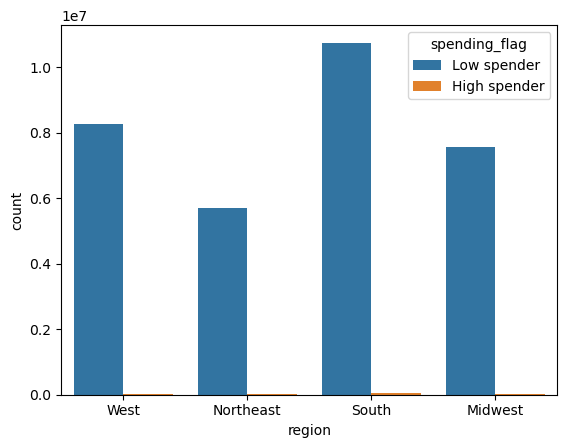

In [53]:
clusterbar = sns.countplot(data=ords_prods_merge1, x='region', hue='spending_flag')

In all regions, there majority of customers are categorized as low spenders. The highest number of high spenders lives in the South. However, the South also has the highest number of low spenders, compared to other regions. It does not appear that high spending customers are associated with one particular US region. 

In [55]:
# Exporting the spending flag vs region bar chart
clusterbar.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'spending_vs_region.png'))

# 05 Excluding low-activity customers from the dataframe

In [35]:
ords_prods_merge1['max_order'].value_counts(dropna=False)

max_order
99    1171076
8      811706
6      811237
9      810057
7      803838
       ...   
97      44949
98      44585
96      40449
2           6
1           5
Name: count, Length: 99, dtype: int64

In [39]:
ords_prods_merge1['max_order'].describe()

count    3.239973e+07
mean     3.305268e+01
std      2.515525e+01
min      1.000000e+00
25%      1.300000e+01
50%      2.600000e+01
75%      4.700000e+01
max      9.900000e+01
Name: max_order, dtype: float64

In [32]:
# Defining 'activity_flag' column using 'max_order' column which gives last order number for each customer
ords_prods_merge1.loc[ords_prods_merge1['max_order'] < 5, 'activity_flag'] = 'Low activity'
ords_prods_merge1.loc[ords_prods_merge1['max_order'] >= 5, 'activity_flag'] = 'Normal activity'

In [33]:
# Checking the 'activity_flag' variable counts
ords_prods_merge1['activity_flag'].value_counts(dropna=False)

activity_flag
Normal activity    30959687
Low activity        1440045
Name: count, dtype: int64

In [36]:
# Exclude low activity customer
exclude_activity = ['Low activity']

In [38]:
# Dataframe with low activity customers filtered out
df = ords_prods_merge1[~ords_prods_merge1['activity_flag'].isin(exclude_activity)]

In [39]:
df['activity_flag'].value_counts(dropna=False)

activity_flag
Normal activity    30959687
Name: count, dtype: int64

# 06 Exporting the dataframe with normal activity customers as a pickle file

In [43]:
df.to_pickle(os.path.join(path, '02 Data','Prepared Data', 'normal_activity_customers.pkl'))